# Faltungsnetz Versuch 5: Daten mit Wiederholung


## Einleitung

Bei diesem Versuch wurde wiederholt die gleiche Route mit einem Fahrrad befahren. Ziel ist es durch die Wiederholung die  befahrenen unterschiedlichen Oberflächen Typen zu reduzieren und somit eine bessere Klassifizerung zu ermöglichen. 

## Hypothese

Durch Wiederholung bei der Datenerfassung sollte sich eine höhere Accuracy erziehlen lassen als im Faltungsnetz Versuch 4. Auf der befahrenen Route gibt es mehr Unebenheiten im Vergleich zu Datensatz 37 bis 42. Dies ermöglicht mehr Daten jeder Klasse zum Trainieren, weil mehr Daten mit hoher Erschütterung zur Verfügung stehen.  

## Versuchsaufbau

Eine Route im Naturschutzgebiet Höltigbaum wurde 14 Mal befahren siehe Abb. 1. Dabei setzen sich die Trainingsdaten aus den Datensätzen Nummer 43 und 45 bis 51 zusammen. Die Gesamtzahl der Bilder beträgt Stück.  

<img src="../daten/abbildungen/karteDatensatz43_45_bis_51.png" />
Abbildung 1: Höltigbaum Route 14 Mal wiederholt befahren

### Versuch 5.1: 3 Fahrqualitäts Klassen

#### Versuchsbeschreibung

Die Daten in diesem Versuch wurden in Fuzzy Logik Versuch 6 klassifiziert. Hierbei wurde unterschieden zwischen den 3 Klassen "gut", "mittel" und "schlecht" nach der Fahrqualität. Dieser Versuch ist eine Wiederholung des Faltungsnetz Versuchs 4.7 mit dem Unterschied, dass wie beschrieben andere Datensätze verwendet wurden. Es wurden 20 Epochen durchgeführt.  

#### Ergebnis

Wie auf Abb. 3 zu sehen sieht die Konfusionsmatrix der Testdaten ähnlich wie in Versuch 4.7 aus. Die Test Accuracy siehe Tab. 5.2 ist, um $2,6\%$ höher. Eigentlich wurde eine deutlich höhere Accuracy erwartet. Auf Tab. 1 ist die Trainingshistorie abgebildet. Durch erhöhen der Anzahl der Epochen könnte sich auch das Ergebnis verbessern.   
  
| | 
 --- | --- |
<img src="../daten/abbildungen/trainingshistorieAccuracyVersuch5_1.png" alt="Konfusionmatrix von Versuch 5.1" /> | <img src="../daten/abbildungen/trainingshistorieLossVersuch5_1.png" alt="Konfusionmatrix von Versuch 5.1" /> 
Abbildung 2: Accuracy l.S. und Loss r.S. des Versuchs 5.1

<img src="../daten/abbildungen/konfmatrixVersuch5_1.png" alt="Konfusionmatrix von Versuch 5.1" /> 
Abbildung 3: Konfusionmatrix von Versuch 5.1

### Versuch 5.2: Binäre Anzahl an Klassen

### Versuchsbeschreibung

In diesem Versuch wurde der Versuch 4.8 wiederholt nur mit den Datensätzen 43 und 45 bis 51. Auch hier wurde erwartet das die Test Accuracy höher ist als im Versuch 4.8. Bei den Versuch gibt es zwei Klassen "gute" oder "schlechte" Fahrqualität.

### Ergebnis

Auf Tab. 1 ist zu sehen, dass die Test Accuracy mit $87,5\%$ deutlich höher ist als im Versuch  4.8 mit $78,7\%$. Dies sollte daran liegen, dass die Anzahl der Trainingsdaten höher ist und eine Route wiederholt befahren  wurde. 

<img src="../daten/abbildungen/konfmatrixVersuch5_2.png" alt="Konfusionmatrix von Versuch 5.2" /> 
Abbildung 2: Konfusionmatrix von Versuch 5.2

## Ergebnisse

Versuch Nr. | Trainings Accuracy | Trainings Loss | Validierungs Accuracy | Validierungs Loss | Test Accuracy | Test Loss 
--- | --- | --- | --- | --- 
5.1   | 0.5524 | 0.9188 | 0.6030 | 0.8369 | 0.5939 | 0.8477
5.2   | 0.8426 | 0.3926 | 0.8766 | 0.3584 | 0.875  | 0.3552
Tabelle 1: Ergebnisse ver Versuche  

In [66]:
from __future__ import print_function
from hyperopt import Trials, STATUS_OK, rand
from hyperas import optim
from hyperas.distributions import uniform, choice
import pandas
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.axes_grid1 import ImageGrid
import os
import cv2
import numpy as np

In [67]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import initializers
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.models import load_model
import keras.callbacks as cb
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [99]:
featuresDf = pandas.read_csv(filepath_or_buffer="../daten/merkmale_datensatz_43_45_bis_51/merkmaleMitLabelnFuzzyVersuch6.csv")

In [100]:
# Nummer des aktuellen Versuchs
experimentNumber = "2"

In [101]:
# Hier können die Datensätze ausgewählt werden
datasets = ['43','45','46','47','48','49','50','51']
# Die Pfade zu den Ordnern in welchem sich die Bilder befinden
paths = []
# Liste mit Pfaden zu den Bildern
imagePaths = []

In [102]:
i = 0
for dataset in datasets: # Für jeden Datensatz merke Pfad
    paths.append("E:/bachelor/daten/" + dataset + "/zugeschnitten/")
for path in paths: # Für jeden Pfad hole die Namen der Ordner
    folders = os.listdir(path)
    folders = sorted(folders, key=int) #sortiert die Reihenfolge de Ordner aufsteifend
    print(path)
    print("Bilder aus folgenden Ordnern werden geladen: " + str(folders))
    for folder in folders: # Aus der Liste der Ordner wird ein Ordner ausgewählt
        filesPath = path + folder + "/"
        files = os.listdir(filesPath)
        print("Ordner der geladen wird: " + str(folder))
        for name in files: # Ein Dateiname aus diesem Ordner
            if "jpg" not in name:
                continue
            if featuresDf['Klasse'].iloc[i] != 1: 
                imagePaths.append(filesPath + name)
            i = i + 1 

E:/bachelor/daten/43/zugeschnitten/
Bilder aus folgenden Ordnern werden geladen: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
Ordner der geladen wird: 1
Ordner der geladen wird: 2
Ordner der geladen wird: 3
Ordner der geladen wird: 4
Ordner der geladen wird: 5
Ordner der geladen wird: 6
Ordner der geladen wird: 7
Ordner der geladen wird: 8
Ordner der geladen wird: 9
Ordner der geladen wird: 10
E:/bachelor/daten/45/zugeschnitten/
Bilder aus folgenden Ordnern werden geladen: ['1', '2', '3', '4', '5']
Ordner der geladen wird: 1
Ordner der geladen wird: 2
Ordner der geladen wird: 3
Ordner der geladen wird: 4
Ordner der geladen wird: 5
E:/bachelor/daten/46/zugeschnitten/
Bilder aus folgenden Ordnern werden geladen: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
Ordner der geladen wird: 1
Ordner der geladen wird: 2
Ordner der geladen wird: 3
Ordner der geladen wird: 4
Ordner der geladen wird: 5
Ordner der geladen wird: 6
Ordner der geladen wird: 7
Ordner der geladen wird: 8

In [126]:
classNames = ['gut','schlecht'] # Namen der Klassen

In [106]:
featuresDf["Klasse"].value_counts()

0    23401
1    22536
Name: Klasse, dtype: int64

In [105]:
featuresDf = featuresDf[featuresDf['Klasse'] != 1]
featuresDf[featuresDf['Klasse'] == 2] = 1

In [107]:
yLabels = np_utils.to_categorical(featuresDf["Klasse"], 0)

In [108]:
# Setzten des RandomState um reproduzierbare Ergebnisse zu erzielen.
np.random.seed(42)

In [109]:
# Mischen der Trainingsdaten
xShuffle, yShuffle = shuffle(imagePaths,yLabels)

In [110]:
class1Number

22536

In [111]:
# Die Zelle Normiert die Anzahl der Repräsentanten pro Klasse
class1Number = 0
class2Number = 0 
class3Number = 0
maxClasses = featuresDf["Klasse"].value_counts().min()
indexToDelete = [] 
i = -1
for label in yShuffle:
    i = i + 1
    labelNumber = np.argmax(label,axis=0)
    if labelNumber == 0 and class1Number < maxClasses:
        class1Number = class1Number + 1
        continue
    elif labelNumber == 0:
        indexToDelete.append(i)
    if labelNumber == 1 and class2Number < maxClasses:
        class2Number = class2Number + 1
        continue
    elif labelNumber == 1:
        indexToDelete.append(i)
    if labelNumber == 2 and class3Number < maxClasses:
        class3Number = class3Number + 1
        continue
    elif labelNumber == 2:
        indexToDelete.append(i)
    if labelNumber == 3 and class4Number < maxClasses:
        class4Number = class4Number + 1
        continue        
xShuffle = [i for j, i in enumerate(xShuffle) if j not in indexToDelete]
yShuffle = [i for j, i in enumerate(yShuffle) if j not in indexToDelete]
yShuffle = np.asarray(yShuffle)

In [112]:
# Mischen der Trainingsdaten
xShuffle, yShuffle = shuffle(xShuffle,yShuffle)

In [113]:
# Aufteilung in Trainings, Validation und Testdaten
xTrain, xTest, yTrain, yTest = train_test_split(xShuffle, yShuffle, test_size=0.10)
xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size=0.20) 

In [115]:
import collections
collections.Counter(np.argmax(yTrain, axis=1))

Counter({0: 16216, 1: 16235})

In [116]:
# Diese Funktion läd Bilder in den Hauptspeicher
# imagesPaths: Liste mit Pfaden zu den Bildern != null
def imageLoader(imagePaths):
    images = []
    for path in imagePaths:
        images.append(cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2RGB))
    imagesNp = np.array(images)
    imagesNp = imagesNp.astype('float32')
    # Transfomierung der Bildpunkte auf den Wetebereich von 0 bis 1
    imagesNp /= 255
    return imagesNp

In [117]:
# Läd Trainingsdaten in batches
def dataLoader(imagePaths, features, batchSize):
    imagesCount = len(imagePaths)  
    while True:
        batchStart = 0
        batchEnd = batchSize
        while batchStart < imagesCount:
            limit = min(batchEnd, imagesCount)
            x = imageLoader(imagePaths[batchStart:limit])
            y = features[batchStart:limit]
            yield (x,y) 
            batchStart += batchSize   
            batchEnd += batchSize

In [118]:
# Parameter für das CNN
inputShape     = (368, 70, 3)   # Eingangs Array-Form 
numNeuronsC1   = 32                # Anzahl der Filter / 1 Faltungsschicht
numNeuronsC2   = 32                # Anzahl der Filter / 2 Faltungsschicht
numNeuronsC3   = 64                # Anzahl der Filter / 3 Faltungsschicht
numNeuronsC4   = 256
numNeuronsD1   = 64                # Anzahl der Neuronen des Fully connected layer - vollverbundene Schicht
poolSize       = 2                 # Größe der Pooling-Layer
convKernelSize = 3                 # Größe des Faltungskern n*n
batchSize      = 16

In [120]:
modelCNN = Sequential()
modelCNN.add(Conv2D(numNeuronsC1, (convKernelSize, convKernelSize), padding='same', input_shape=inputShape,kernel_initializer=initializers.glorot_uniform(seed=42)))
modelCNN.add(Activation("elu"))
modelCNN.add(MaxPooling2D(pool_size=(poolSize, poolSize)))
modelCNN.add(Dropout(0.11))
modelCNN.add(Conv2D(numNeuronsC2, (convKernelSize, convKernelSize), padding='same', kernel_initializer=initializers.glorot_uniform(seed=42)))
modelCNN.add(Activation("elu"))
modelCNN.add(MaxPooling2D(pool_size=(poolSize, poolSize)))
modelCNN.add(Dropout(0.38))
modelCNN.add(Conv2D(numNeuronsC3, (convKernelSize, convKernelSize), padding='same', kernel_initializer=initializers.glorot_uniform(seed=42)))
modelCNN.add(Activation("elu"))
modelCNN.add(MaxPooling2D(pool_size=(poolSize, poolSize)))       
modelCNN.add(Dropout(0.30))
modelCNN.add(Conv2D(numNeuronsC4, (convKernelSize, convKernelSize), padding='same', kernel_initializer=initializers.glorot_uniform(seed=42)))
modelCNN.add(Activation("elu"))
modelCNN.add(MaxPooling2D(pool_size=(poolSize, poolSize)))       
modelCNN.add(Dropout(0.49))
modelCNN.add(Flatten())
modelCNN.add(Dense(numNeuronsD1, kernel_initializer=initializers.glorot_uniform(seed=42)))
modelCNN.add(Activation("elu"))
modelCNN.add(Dropout(0.36)) 
modelCNN.add(Dense(2, kernel_initializer=initializers.glorot_uniform(seed=42)))
modelCNN.add(Activation('softmax'))
            
modelCNN.compile(loss='categorical_crossentropy', optimizer="RMSprop", metrics=["accuracy"])

earlyStopping  = cb.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='max')
checkpointSafe = cb.ModelCheckpoint('ergebnisse_versuch5/modell_versuch5_' + experimentNumber, monitor='val_acc', save_best_only=True)   
hist = modelCNN.fit_generator(dataLoader(xTrain, yTrain, batchSize), epochs=20, steps_per_epoch=(int(len(xTrain)/batchSize)),
              validation_data=dataLoader(xVal, yVal, batchSize), validation_steps=(int(len(xVal)/batchSize)), callbacks=[earlyStopping,checkpointSafe])

score, acc = modelCNN.evaluate_generator( dataLoader(xTest, yTest, batchSize), steps=(int(len(xTest)/batchSize)))
print('Test score: '    +  str(score))
print('Test accuracy: ' +  str(acc)  )

Epoch 1/20
2028/2028 [==============================] - 145s 72ms/step - loss: 4.0808 - acc: 0.5422 - val_loss: 0.5906 - val_acc: 0.7427
Epoch 2/20
2028/2028 [==============================] - 143s 71ms/step - loss: 0.5358 - acc: 0.7367 - val_loss: 0.3807 - val_acc: 0.8465
Epoch 3/20
2028/2028 [==============================] - 143s 71ms/step - loss: 0.4305 - acc: 0.8187 - val_loss: 0.3783 - val_acc: 0.8481
Epoch 4/20
2028/2028 [==============================] - 143s 71ms/step - loss: 0.4075 - acc: 0.8341 - val_loss: 0.3718 - val_acc: 0.8528
Epoch 5/20
2028/2028 [==============================] - 146s 72ms/step - loss: 0.4020 - acc: 0.8380 - val_loss: 0.3409 - val_acc: 0.8706
Epoch 6/20
2028/2028 [==============================] - 144s 71ms/step - loss: 0.3926 - acc: 0.8426 - val_loss: 0.3584 - val_acc: 0.8766
Epoch 7/20
2028/2028 [==============================] - 144s 71ms/step - loss: 0.3883 - acc: 0.8476 - val_loss: 0.5014 - val_acc: 0.8417
Epoch 8/20
2028/2028 [===================

<Figure size 432x288 with 0 Axes>

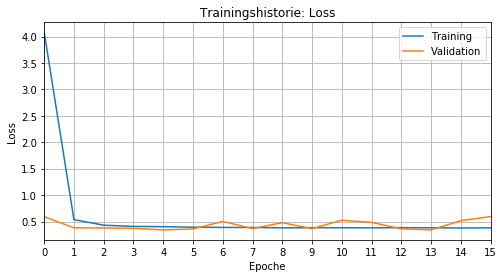

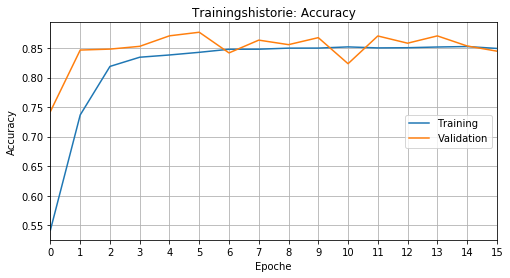

In [121]:
# Plot Modell Historie Loss und Accuracy
plt.figure(1)
plt.figure(figsize=(8,4))
plt.title('Trainingshistorie: Loss')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.xlim(0,15)
plt.grid(True)
plt.savefig("trainingshistorieLossVersuch5_" + experimentNumber + ".png")
plt.xticks(np.arange(0, 15.1, step=1))
plt.figure(2)
plt.figure(figsize=(8,4))
plt.title('Trainingshistorie: Accuracy')
plt.xticks()
plt.xlabel('Epoche')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='right')
plt.xlim(0,15)
plt.xticks(np.arange(0, 15.1, step=1))
plt.grid(True)
plt.savefig("trainingshistorieAccuracyVersuch5_" + experimentNumber + ".png")
plt.show()

In [122]:
# Läd Modell
modell1 = load_model('ergebnisse_versuch5/modell_versuch5_2')

In [123]:
modell1.evaluate_generator( dataLoader(xTest, yTest, 16), steps=int(len(xTest)/16))

[0.35521340508053734, 0.875]

In [124]:
# Bei der Verwendung von predict_generator werden die daten gemischt 
validPreds = []
imageList = []
for path in xTest:
    imageList = []   
    img = cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img.astype('float32')
    img /= 255
    imageList.append(img)
    validPreds.append(modell1.predict(np.asarray(imageList)))

[[2044  162]
 [ 400 1902]]


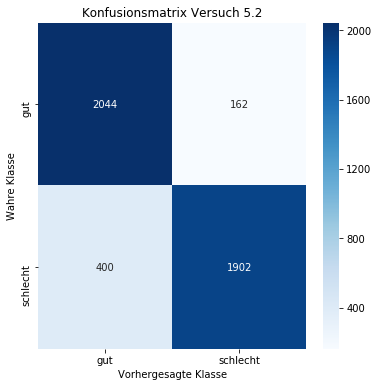

In [127]:
# Konfusionsmatrix
validPredArray = np.argmax(np.vstack(validPreds), axis=1)
yTestMax = np.argmax(yTest,axis=1)
cnfMatrix = confusion_matrix(yTestMax, validPredArray)
print(cnfMatrix)
fig, ax = plt.subplots(figsize=(6,6)) 
ax = sns.heatmap(cnfMatrix, fmt="d", cmap=plt.cm.Blues, ax=ax , annot=True)
ax.set_xticklabels(classNames)
ax.set_yticklabels(classNames)
plt.title('Konfusionsmatrix Versuch 5.2')
plt.ylabel('Wahre Klasse')
plt.xlabel('Vorhergesagte Klasse')
plt.savefig('konfmatrixVersuch5_2.png')
plt.show()